In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os

In [2]:
file_path = os.getcwd()

In [3]:
file_path

'/home/workstation2/\xeb\xac\xb8\xec\x84\x9c'

In [4]:
file_path = file_path + "/var_check/levy_var_check_200"

In [5]:
file_path

'/home/workstation2/\xeb\xac\xb8\xec\x84\x9c/var_check/levy_var_check_200'

In [6]:
grids = []
acq_grids = []
for i in range(5,34):
    grids.append(np.load(file_path + "/grid_iter_%d.npy"%i))
    acq_grids.append(np.load(file_path + "/saved_acq_iter_%d.npy"%i))

In [7]:
x_min = -5
x_max = 5

In [8]:
mapped_grids = []

for grid in grids:
    mapped_grid = []
    for point in grid:
        mapped_point = point * (x_max - x_min) + x_min
        mapped_grid.append(mapped_point)
        
    mapped_grids.append(mapped_grid)

In [9]:
sort = [2,3,1,4,5]

In [10]:
sorted(sort)

[1, 2, 3, 4, 5]

In [11]:
sort_index = np.argsort(sort)

In [12]:
sort_index

array([2, 0, 1, 3, 4])

In [13]:
acq_grids[0]

array([[0.06282853, 0.00043439, 0.09716774, ..., 0.10779341, 0.10775369,
        0.10768454],
       [0.19096792, 0.09045304, 0.11743545, ..., 0.16949154, 0.16951622,
        0.16943728],
       [0.09665886, 0.15344954, 0.00358024, ..., 0.11588877, 0.11589526,
        0.11588732],
       ...,
       [0.18506126, 0.00346054, 0.00370761, ..., 0.00186447, 0.00186511,
        0.00186212],
       [0.16347652, 0.040517  , 0.05540831, ..., 0.0837873 , 0.08379992,
        0.08376756],
       [0.24356304, 0.01678105, 0.0696714 , ..., 0.1132001 , 0.11312073,
        0.11306645]])

In [14]:
acq_grids[0][0]

array([0.06282853, 0.00043439, 0.09716774, ..., 0.10779341, 0.10775369,
       0.10768454])

In [15]:
# can get sorted index of .......
np.argsort(acq_grids[0][0])[::-1]

array([ 9579,  5815,  5671, ..., 10002, 10003, 10004])

In [16]:
len(acq_grids[0])

200

In [17]:
sort_idx_list = []
for m in range(200):
    cur_target_grids = list(acq_grids[0][:m+1])
    avg_cur_target_grids = np.average(cur_target_grids, axis=0)
    sort_idx = np.argsort(avg_cur_target_grids)
    sort_idx_list.append(sort_idx)

In [18]:
sort_idx_list[0][::-1][:50]

array([9579, 5815, 5671, 9095, 8203, 1959, 3031, 6427, 2619, 3391, 3819,
       6903, 1079, 8815, 7847,  187, 4591, 8463, 7387, 7683, 5259, 1015,
       6595, 3911, 1283, 3759, 5991, 1439, 6519, 1803,  667, 2575, 9363,
        547, 5327, 2379, 9083, 9919, 4523, 7327, 3299, 1295, 5067, 4179,
       8627, 6735, 4951, 3799, 4915, 3223])

In [19]:
sort_idx_list_iter = []
for iter_num in range(len(acq_grids)):
    sort_idx_list = []
    for m in range(200):
        cur_target_grids = list(acq_grids[iter_num][:m+1])
        avg_cur_target_grids = np.average(cur_target_grids, axis=0)
        sort_idx = np.argsort(avg_cur_target_grids)[::-1]
        sort_idx_list.append(sort_idx)
        
    sort_idx_list_iter.append(sort_idx_list)

In [20]:
iter_0_first_50s = [item[:1000] for item in sort_idx_list_iter[0]]

set_list = []
for i in range(len(iter_0_first_50s)):
    set_list.append(set(iter_0_first_50s[i]))
    
numbers = []
for i in range(len(set_list)-1):
    numbers.append(len(set_list[i].difference(set_list[i+1])))

(0, 100)

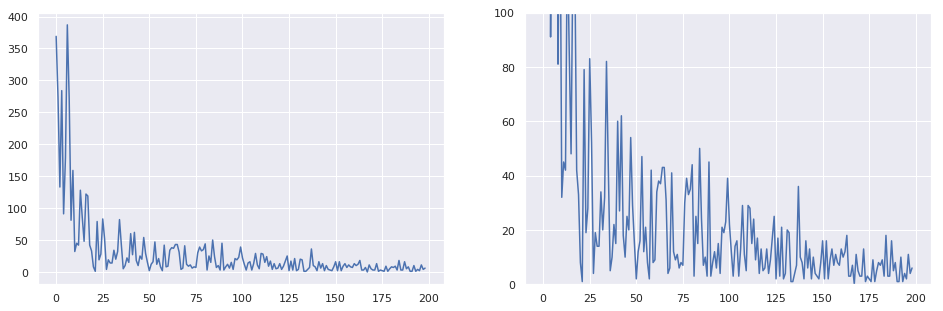

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
ax1.plot(numbers)
ax2.plot(numbers)
ax2.set_ylim([0,100])

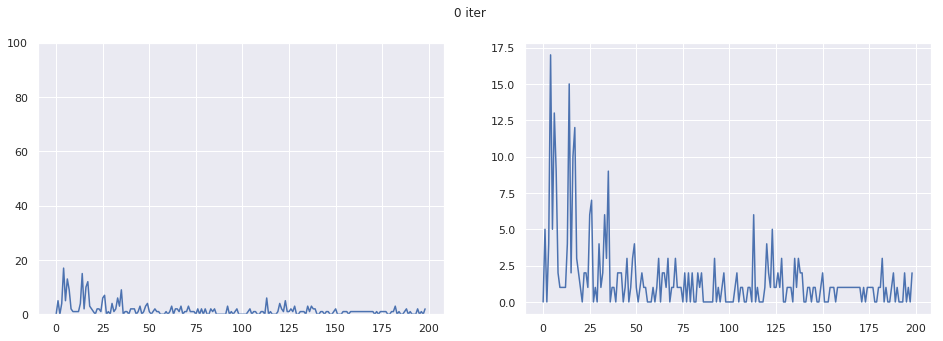

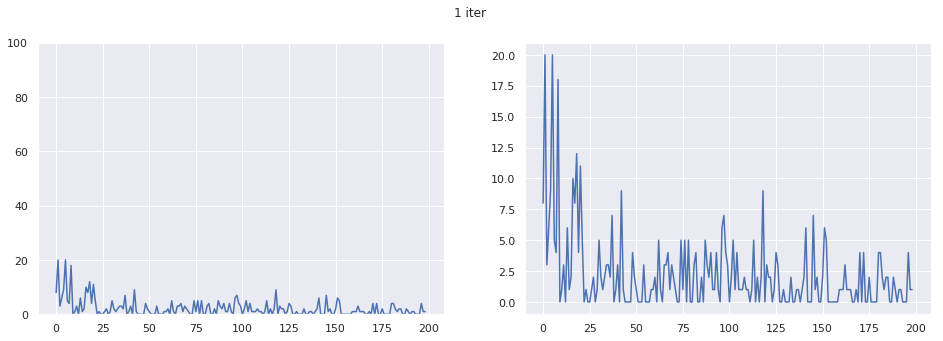

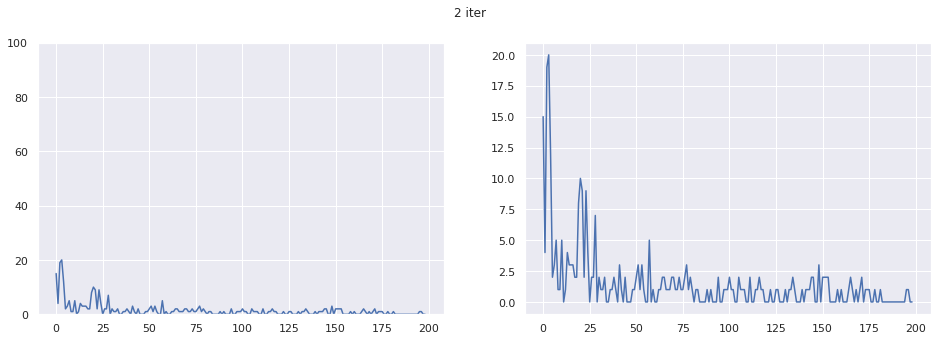

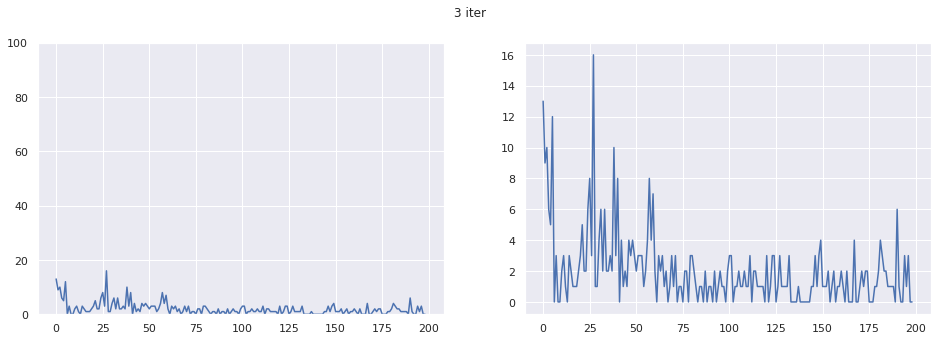

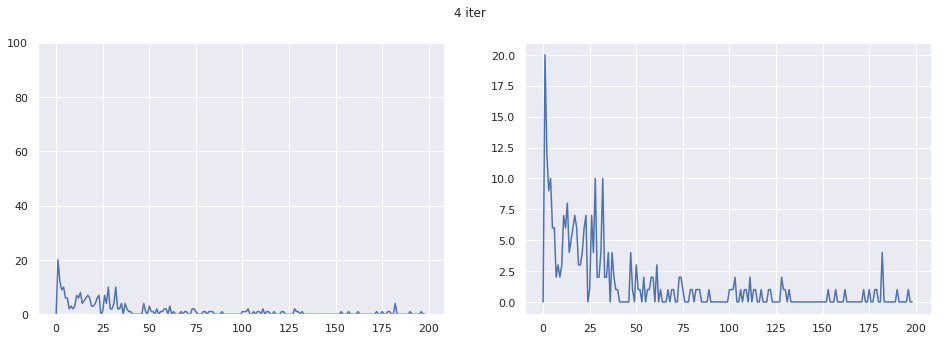

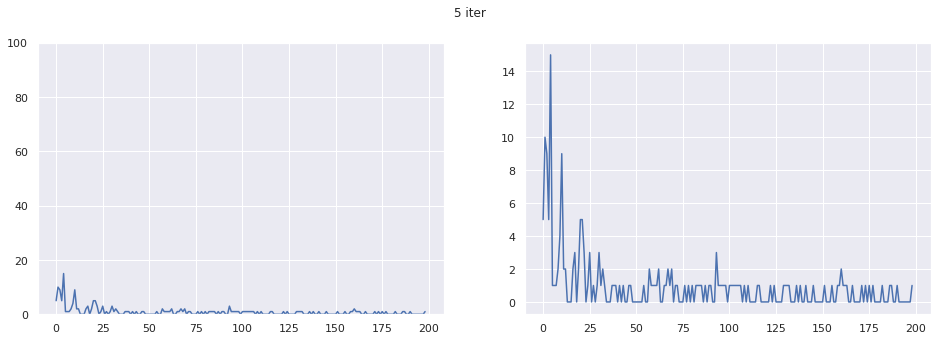

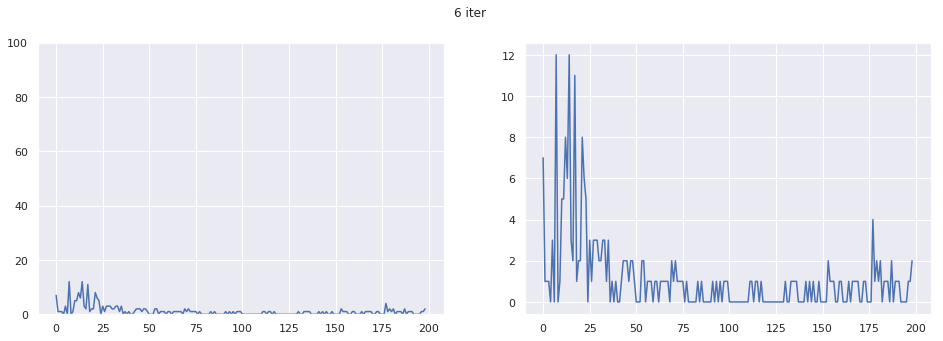

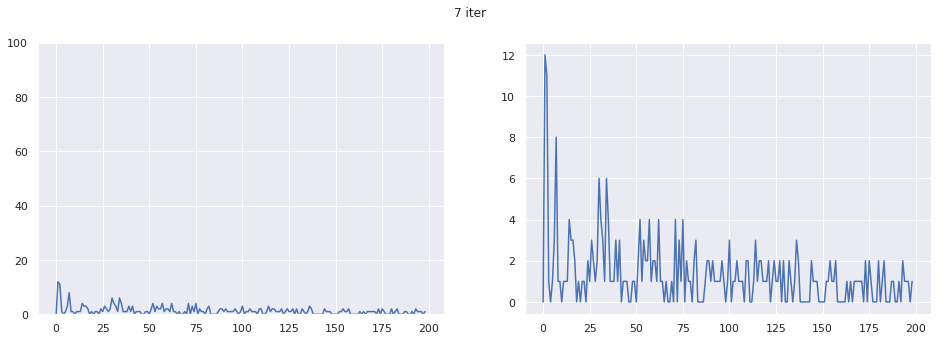

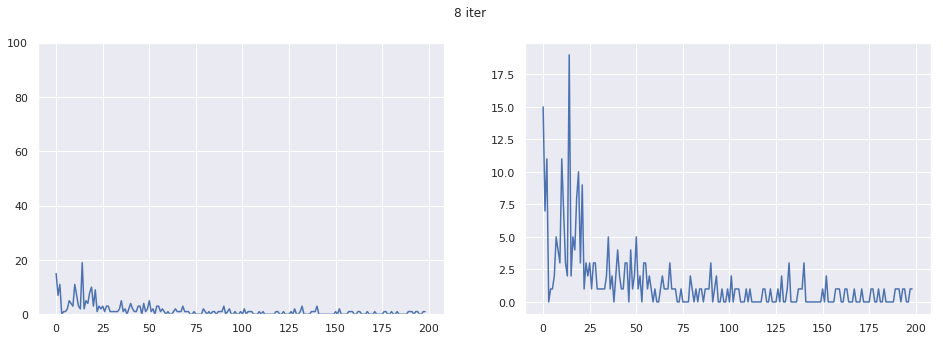

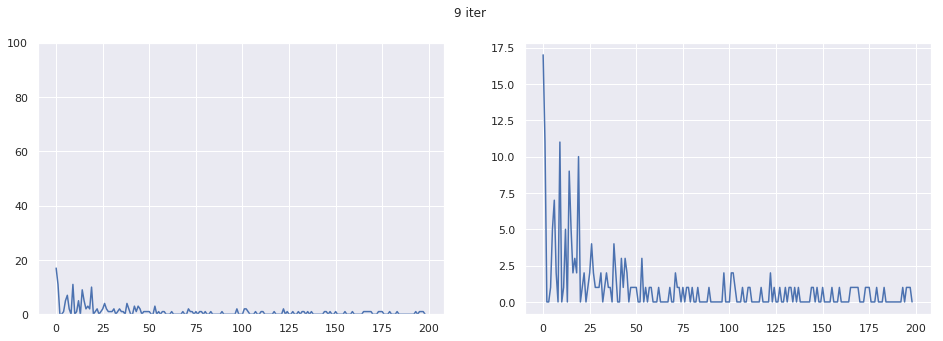

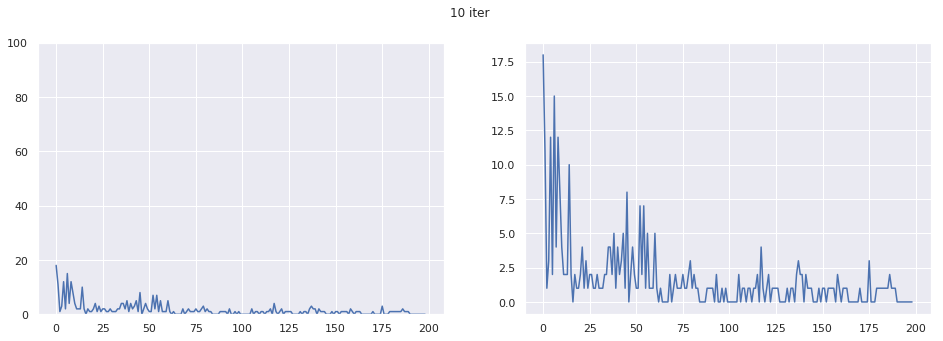

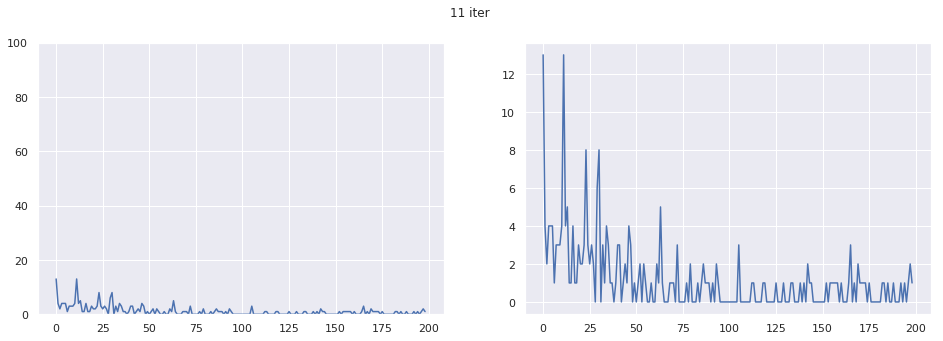

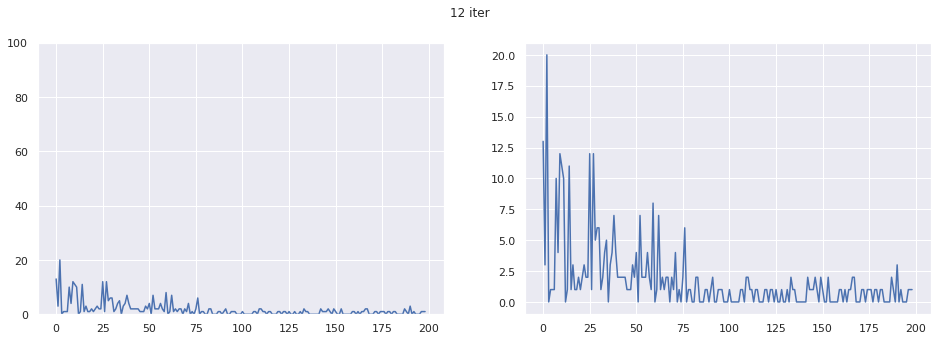

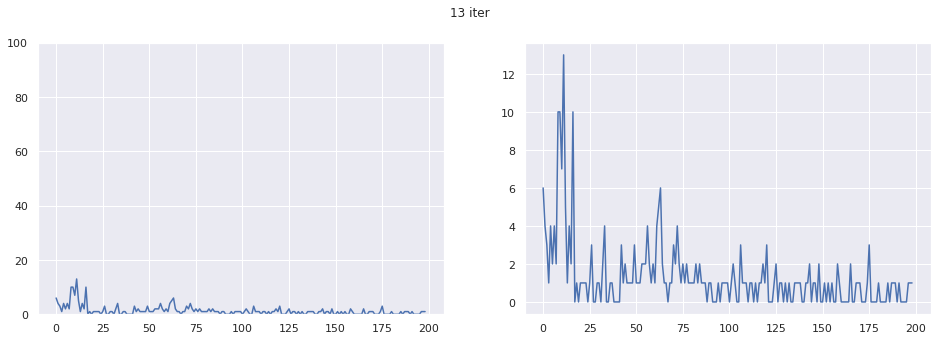

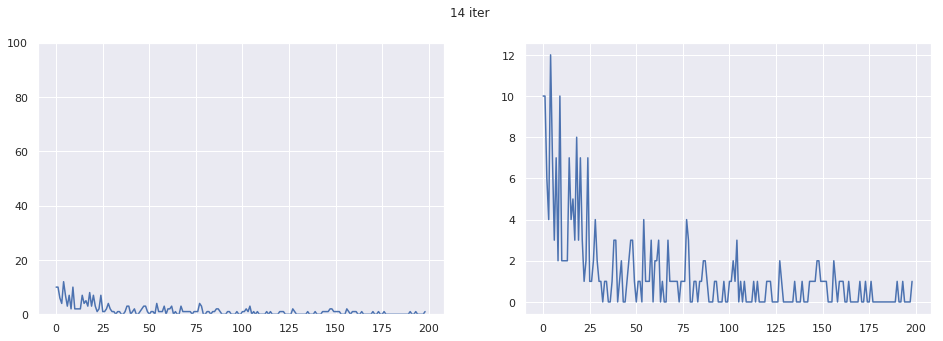

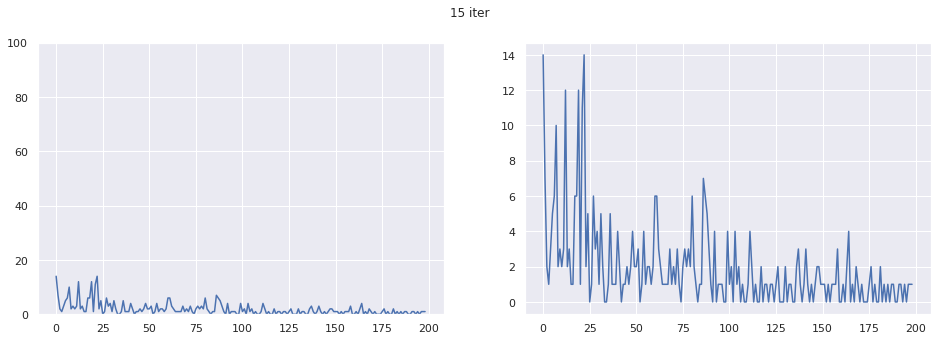

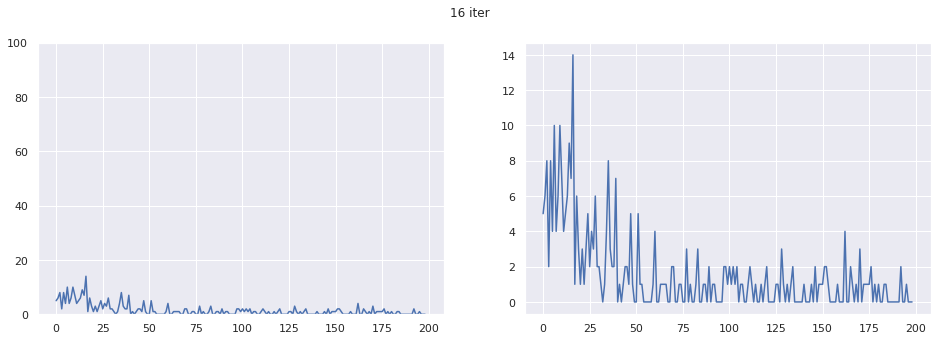

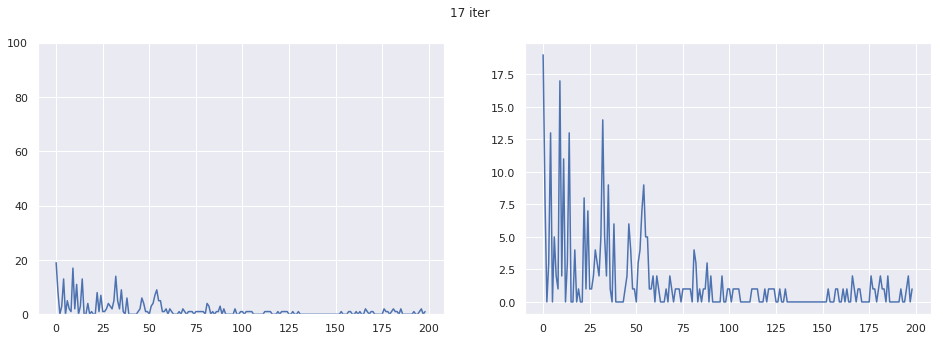

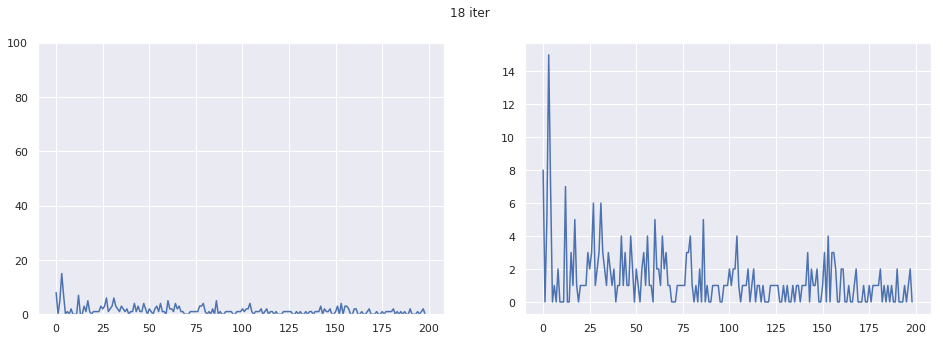

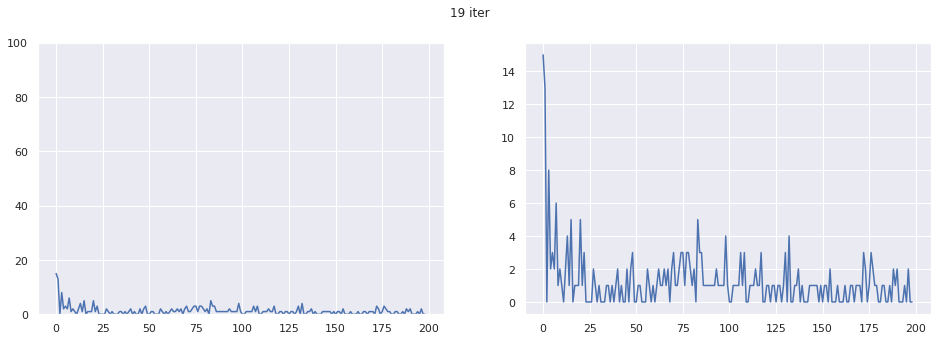

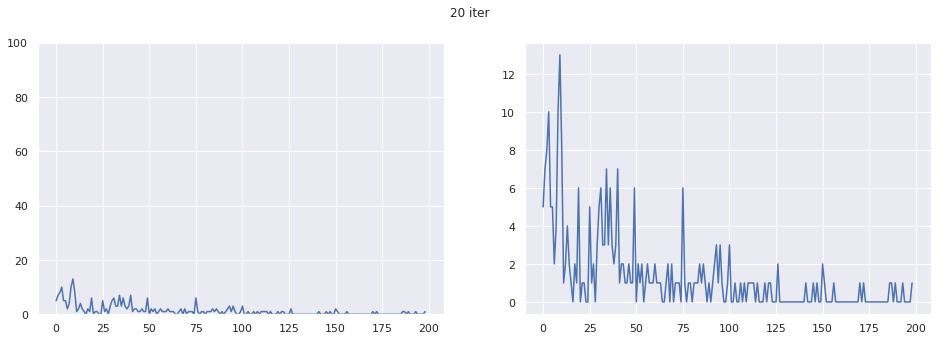

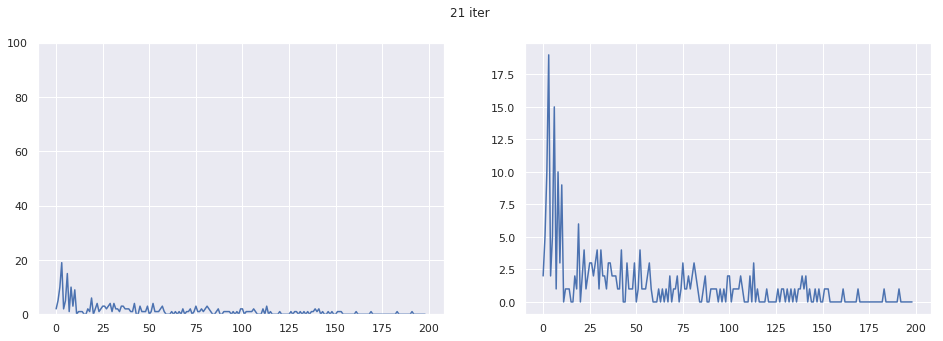

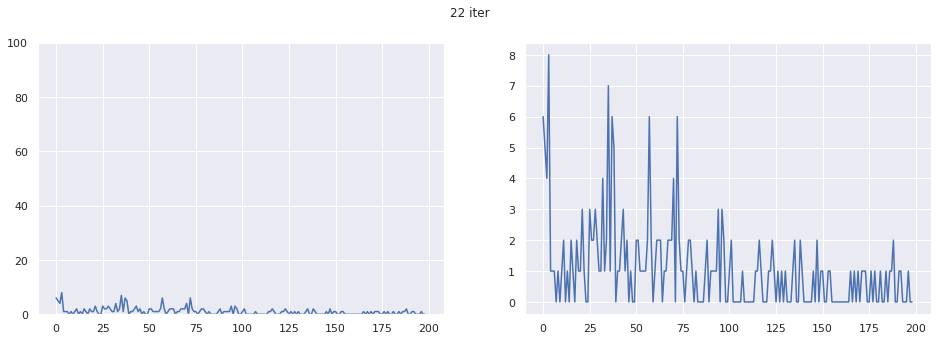

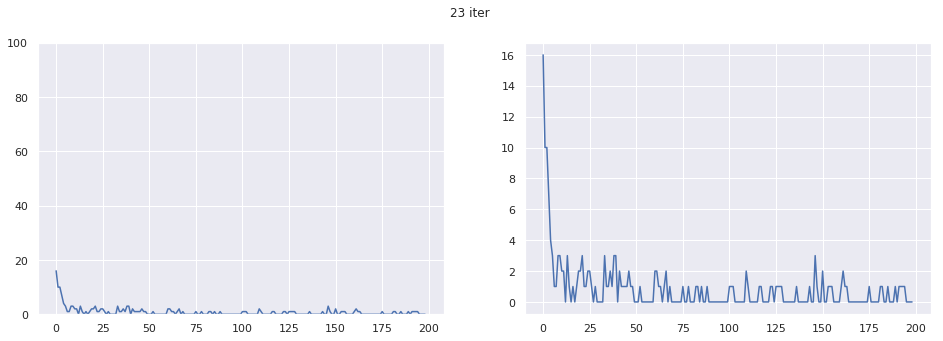

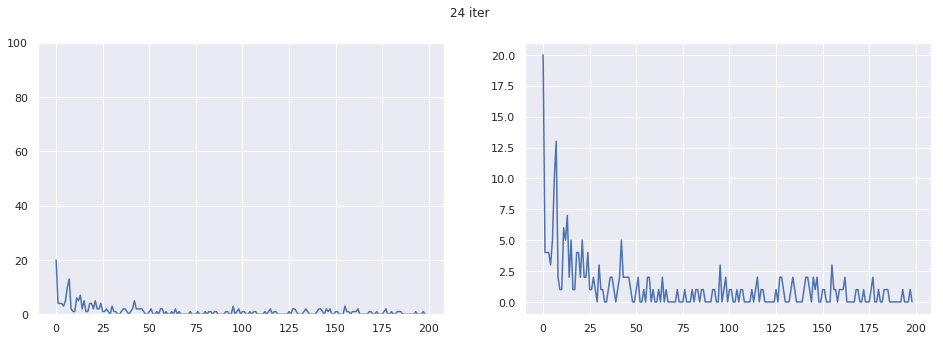

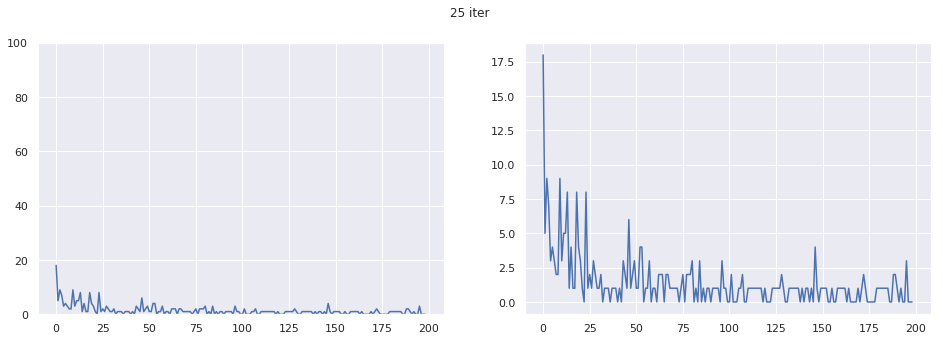

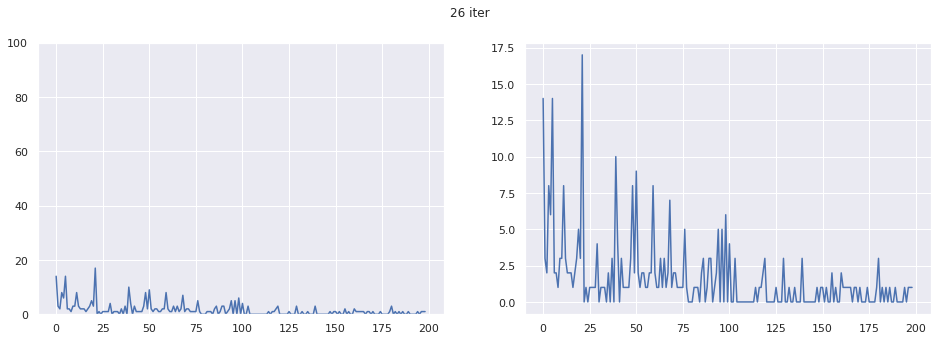

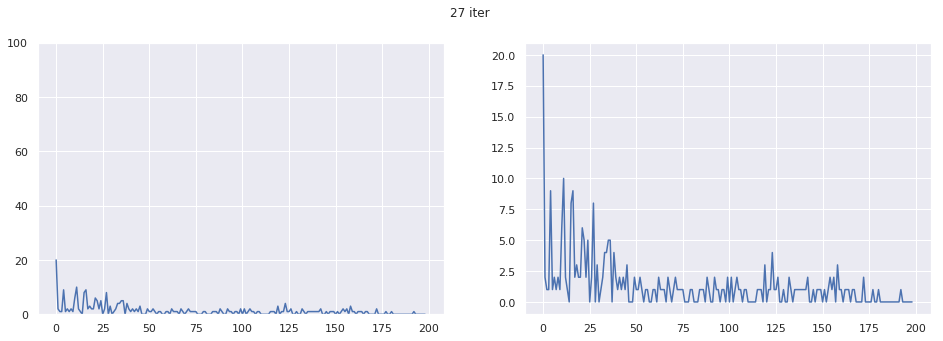

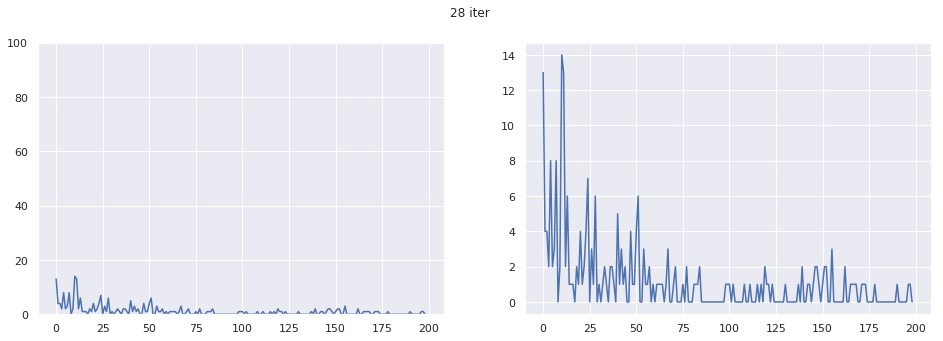

In [31]:
for iter_num in range(len(sort_idx_list_iter)):
    cur_first = [item[:20] for item in sort_idx_list_iter[iter_num]]
    
    set_list = []
    for i in range(len(cur_first)):
        set_list.append(set(cur_first[i]))
        
    numbers = []
    for i in range(len(set_list)-1):
        numbers.append(len(set_list[i].difference(set_list[i+1])))
        
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
    ax1.plot(numbers)
    ax2.plot(numbers)
    ax1.set_ylim([0,100])
    fig.suptitle("%d iter"%iter_num)
    plt.show()

In [23]:
sort_idx_list_iter[0]

[array([ 9579,  5815,  5671, ..., 10002, 10003, 10004]),
 array([ 9579,  5815,  5671, ..., 10002, 10003, 10004]),
 array([ 5685,  9579,  5671, ..., 10002, 10003, 10004]),
 array([ 9579,  5685,  5671, ..., 10002, 10003, 10004]),
 array([ 5685,  9579,  3044, ..., 10002, 10003, 10004]),
 array([ 6427,  8679,  5541, ..., 10003, 10002, 10004]),
 array([ 6427,  8679,  1783, ..., 10003, 10002, 10004]),
 array([ 7144,  1272,  6664, ..., 10003, 10002, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  1272, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 3328,   912,  7144, ..., 10002, 10003, 10004]),
 array([ 3328,   912,  7816, ..., 10002, 10003, 10004]),
 array([ 9952,  4598,  3328, ..

In [ ]:
sort_idx_list = []
for m in range(200):
    cur_target_grids = list(acq_grids[0][:m+1])
    avg_cur_target_grids = np.average(cur_target_grids, axis=0)
    sort_idx = np.argsort(avg_cur_target_grids)
    sort_idx_list.append(sort_idx)

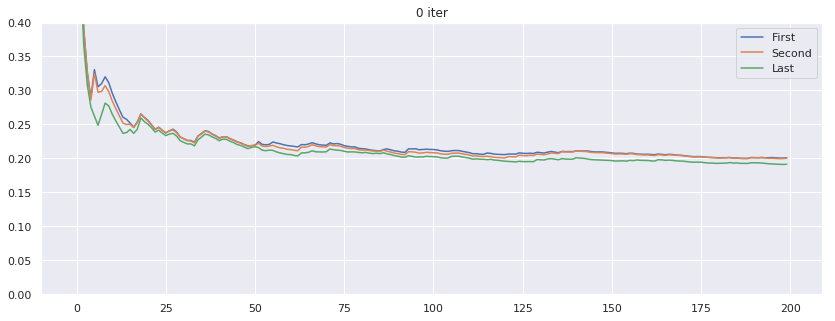

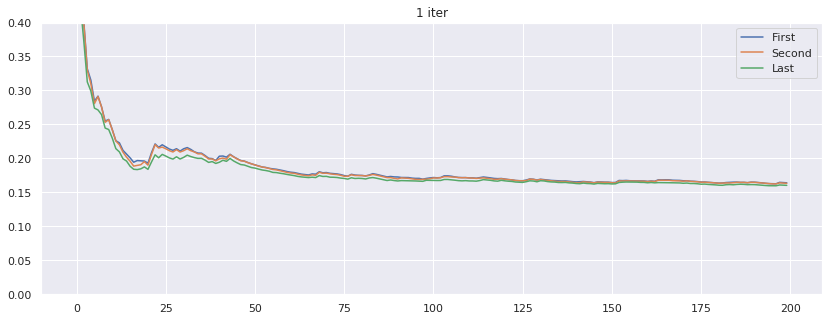

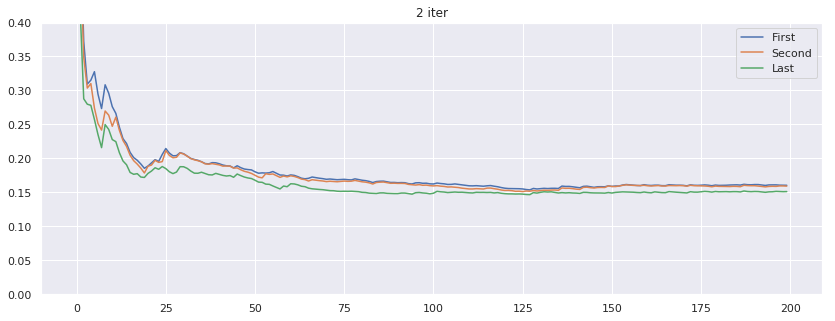

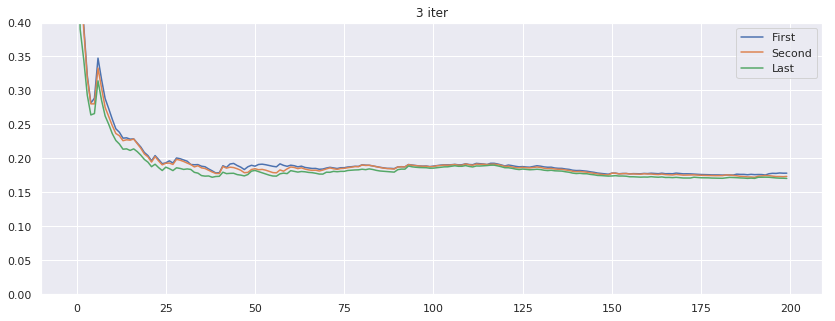

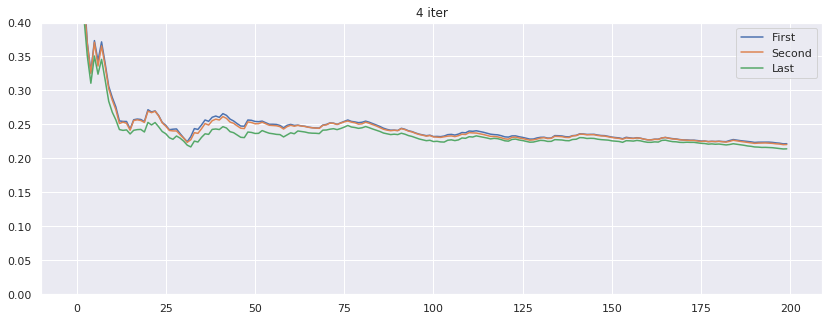

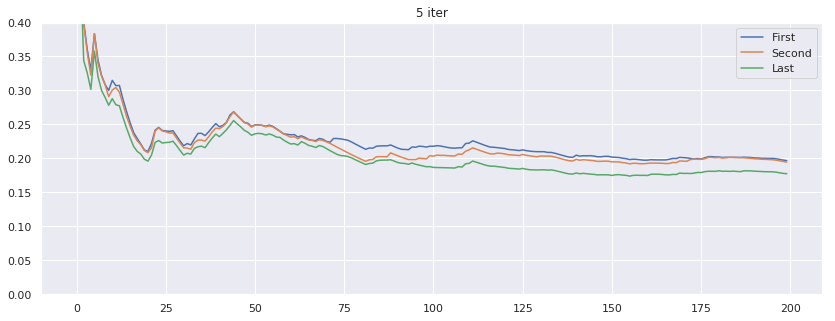

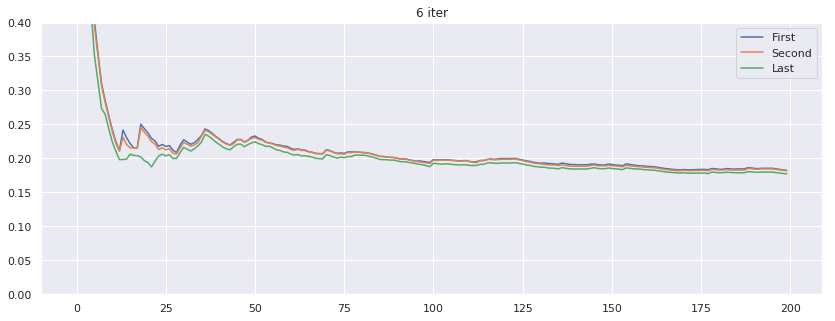

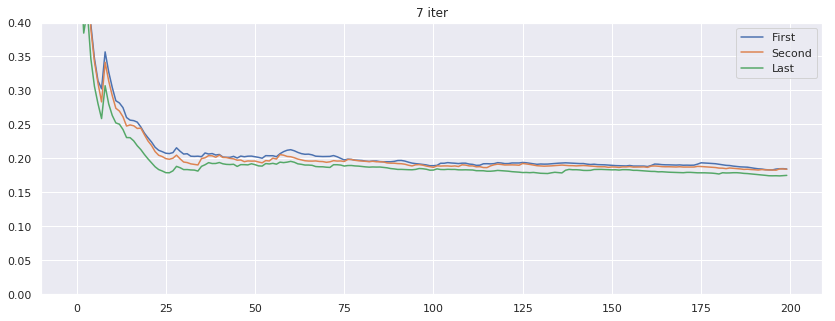

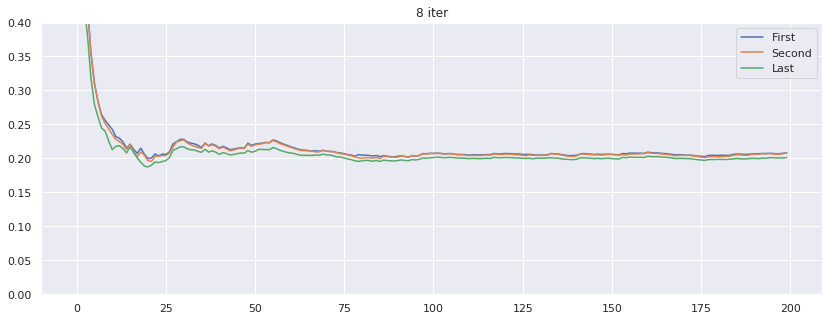

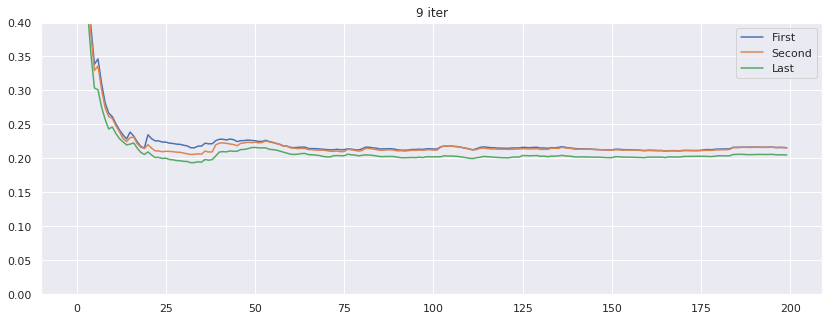

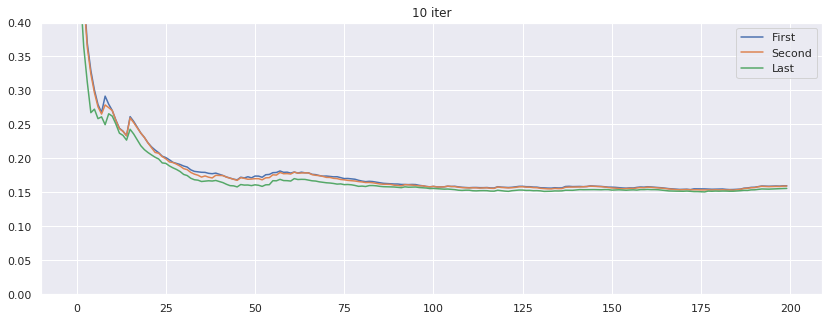

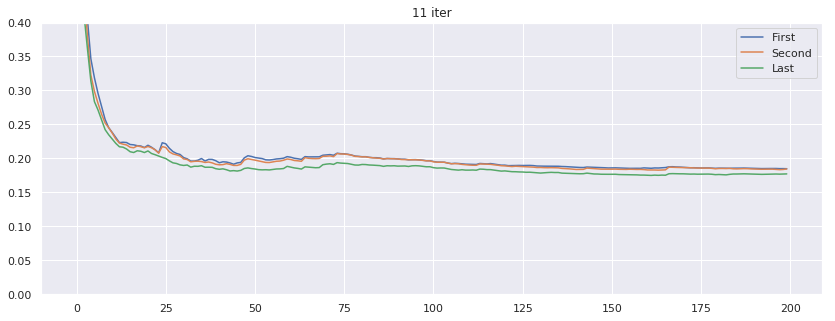

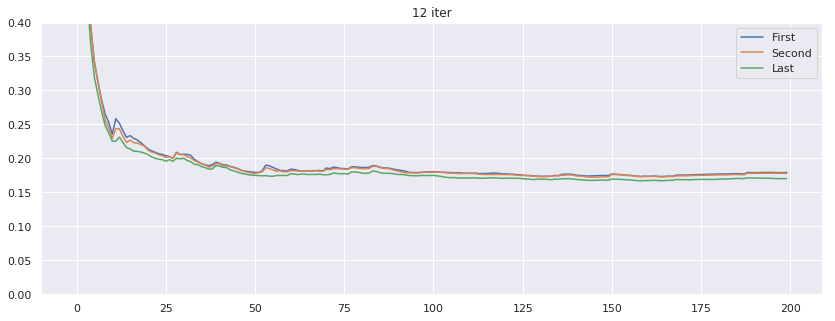

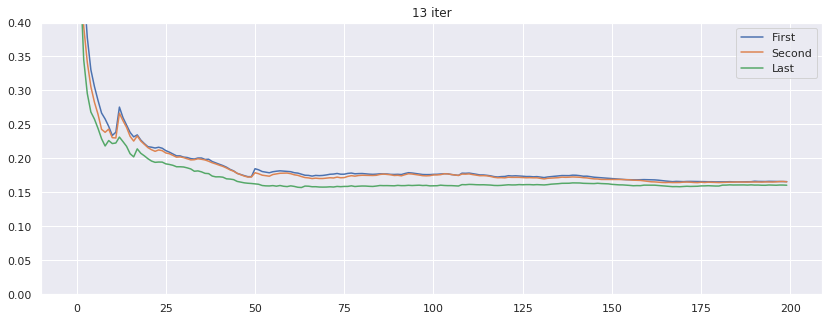

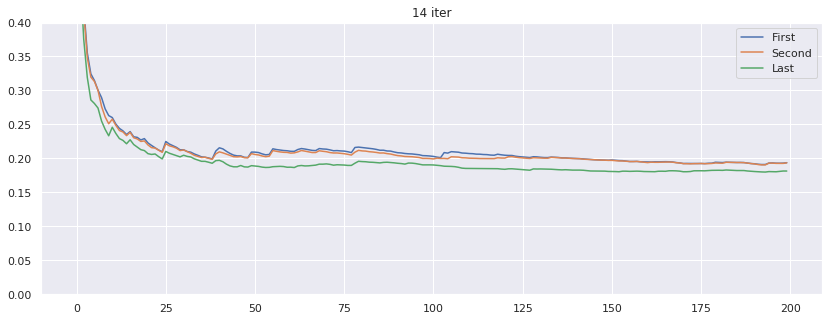

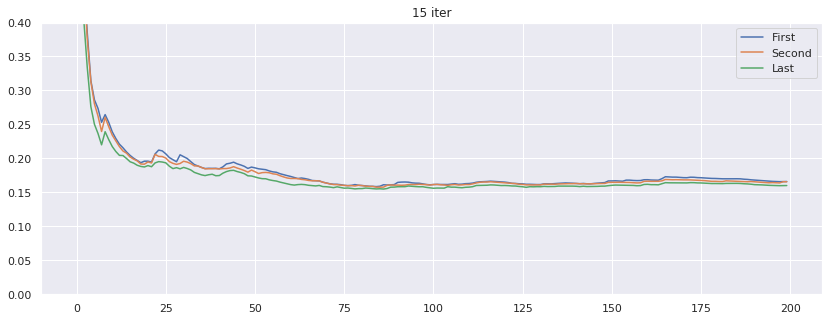

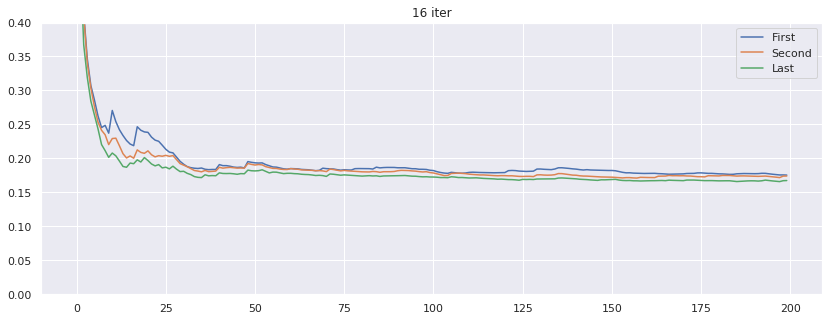

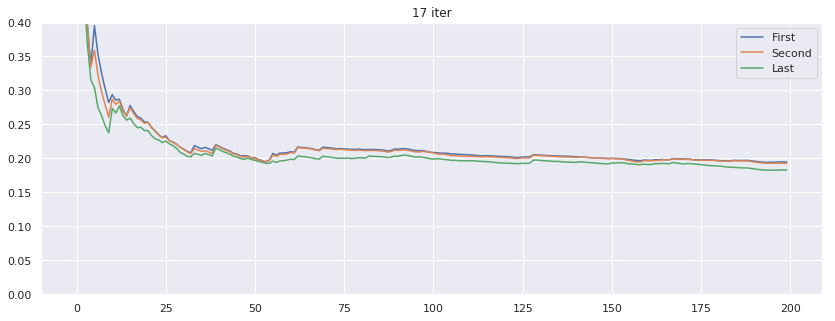

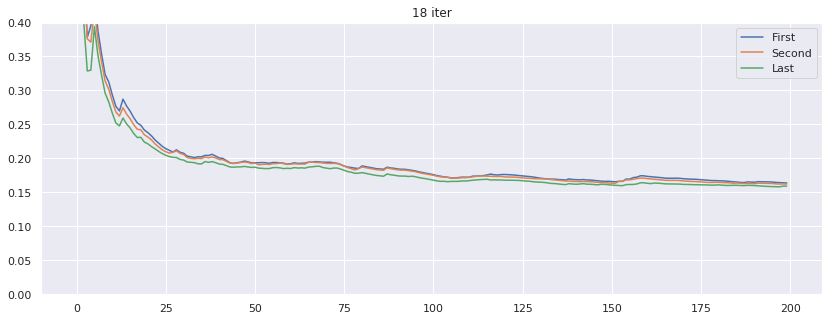

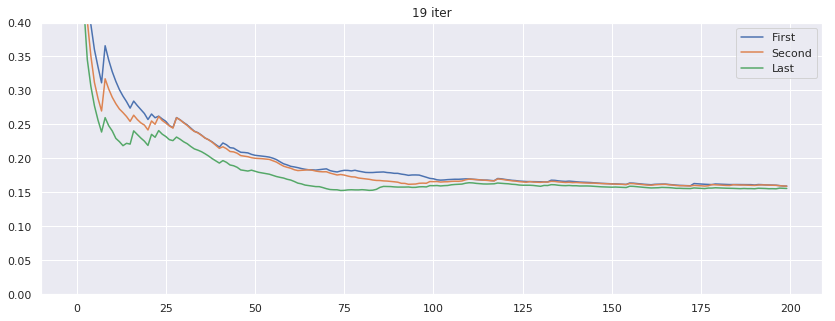

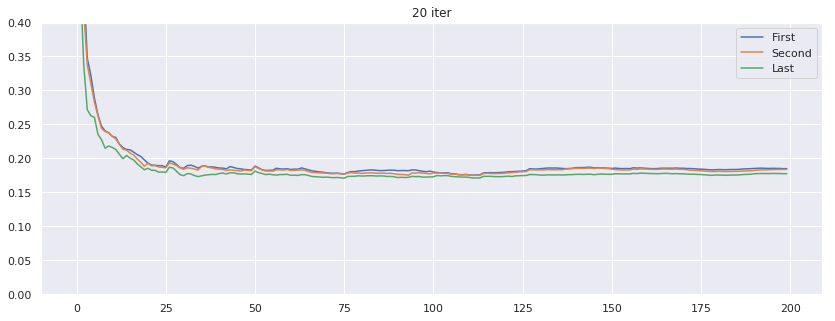

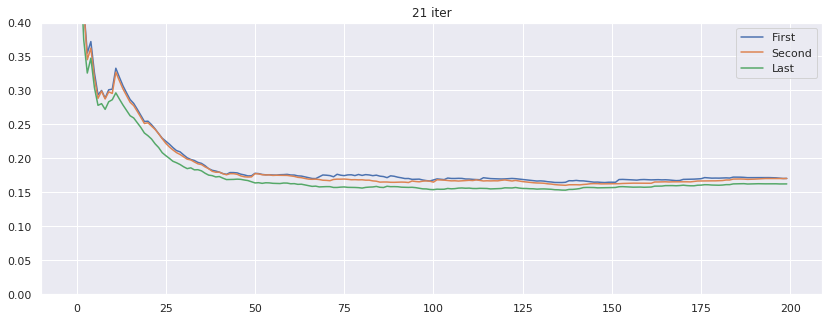

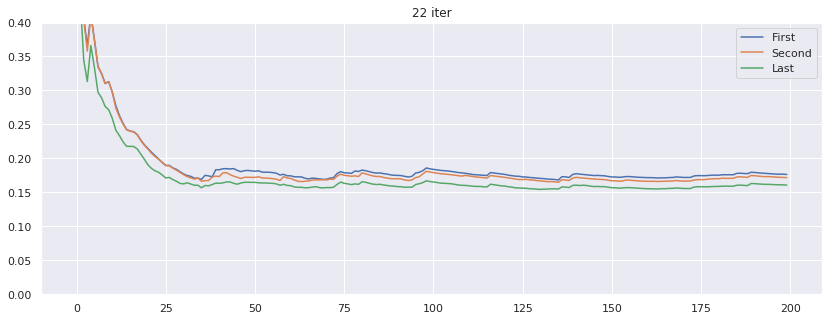

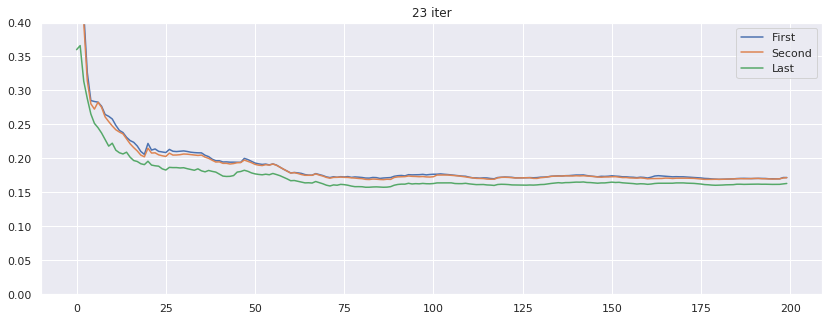

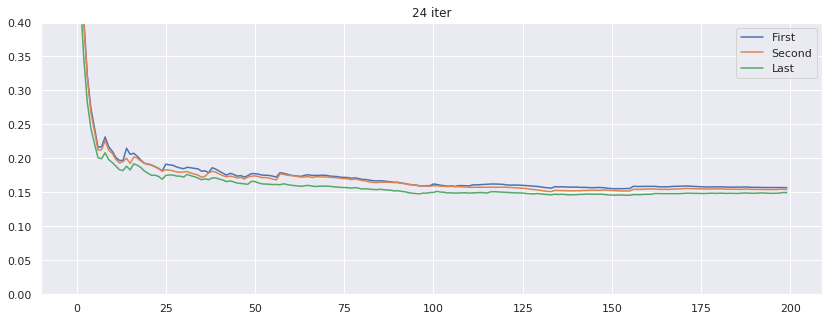

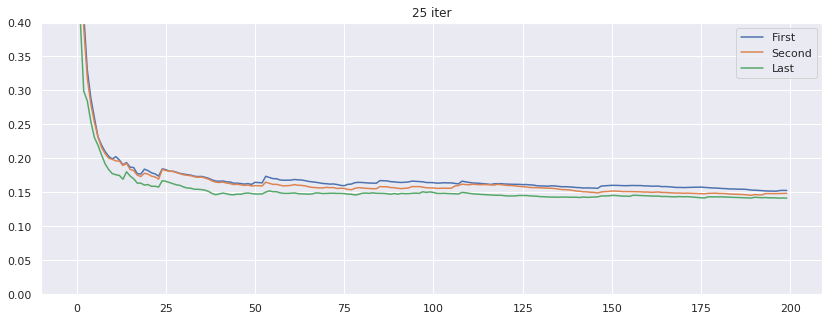

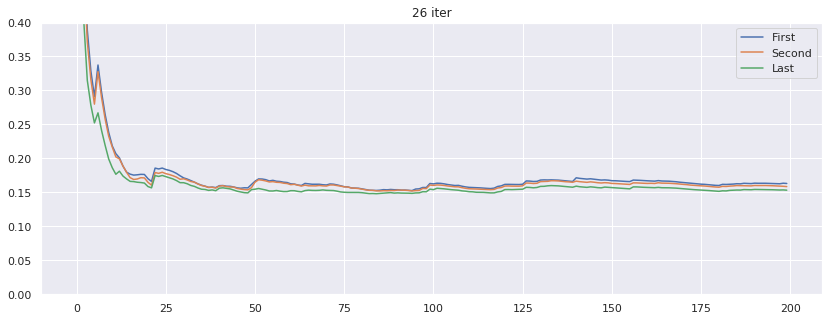

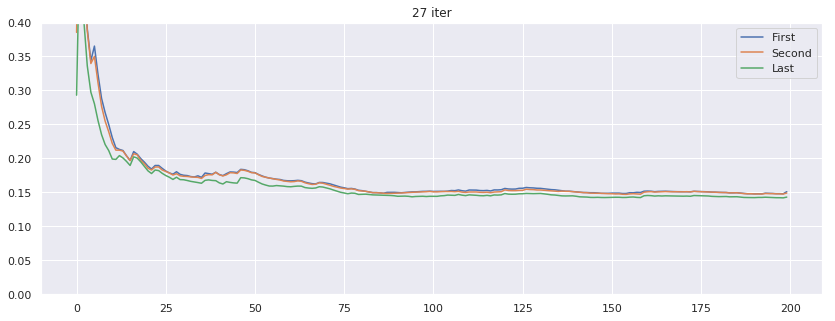

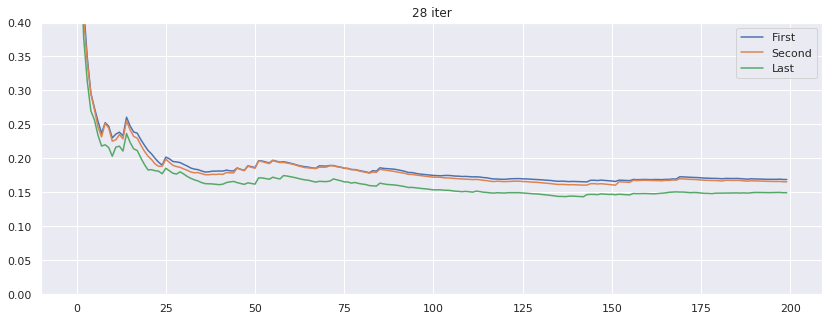

In [30]:
for iter_num in range(len(acq_grids)):
    first_acq_vals = []
    second_acq_vals = []
    last_acq_vals = []
    for m in range(200):
        cur_target_grids = list(acq_grids[iter_num][:m+1])
        avg_cur_target_grids = np.average(cur_target_grids, axis=0)
        sort_idx = np.argsort(avg_cur_target_grids)
        first_acq_vals.append(avg_cur_target_grids[sort_idx[-1]])
        second_acq_vals.append(avg_cur_target_grids[sort_idx[-2]])
        last_acq_vals.append(avg_cur_target_grids[sort_idx[-10]])
    plt.figure(figsize=(14,5))
    plt.plot(first_acq_vals, label='First')
    plt.plot(second_acq_vals, label='Second')
    plt.plot(last_acq_vals, label='Last')
    plt.ylim(ymin=0, ymax=0.4)
    plt.legend()
    plt.title("%d iter"%iter_num)
    plt.show()

In [32]:
sort_idx_list_iter[0]

[array([ 9579,  5815,  5671, ..., 10002, 10003, 10004]),
 array([ 9579,  5815,  5671, ..., 10002, 10003, 10004]),
 array([ 5685,  9579,  5671, ..., 10002, 10003, 10004]),
 array([ 9579,  5685,  5671, ..., 10002, 10003, 10004]),
 array([ 5685,  9579,  3044, ..., 10002, 10003, 10004]),
 array([ 6427,  8679,  5541, ..., 10003, 10002, 10004]),
 array([ 6427,  8679,  1783, ..., 10003, 10002, 10004]),
 array([ 7144,  1272,  6664, ..., 10003, 10002, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  1272, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 7144,  6664,  7472, ..., 10002, 10003, 10004]),
 array([ 3328,   912,  7144, ..., 10002, 10003, 10004]),
 array([ 3328,   912,  7816, ..., 10002, 10003, 10004]),
 array([ 9952,  4598,  3328, ..

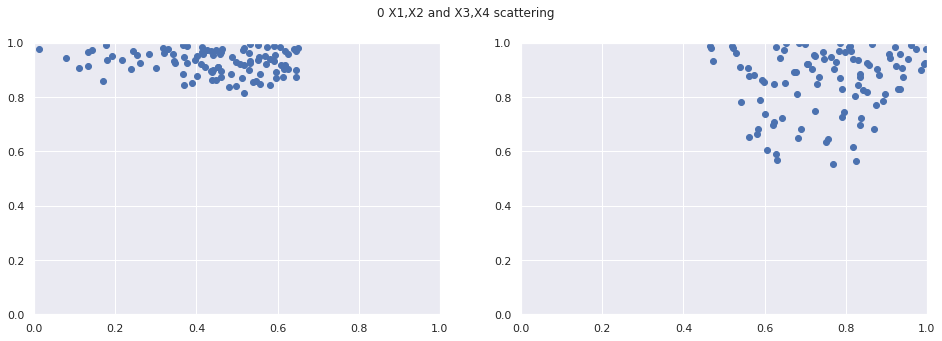

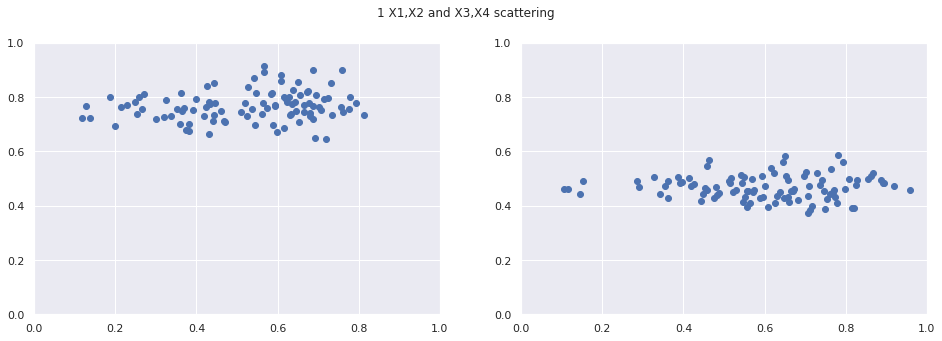

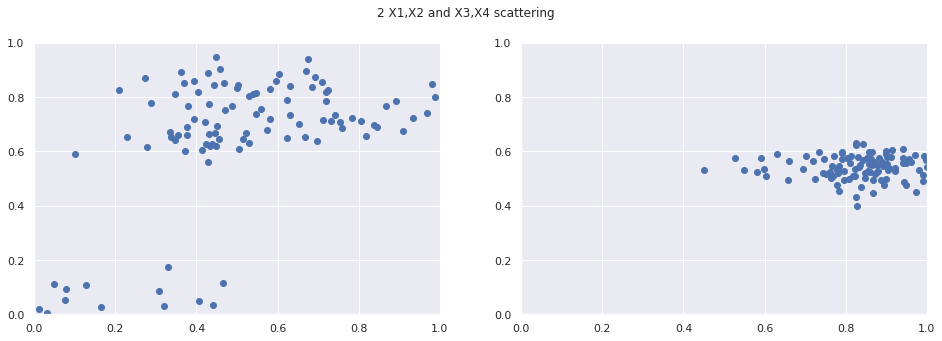

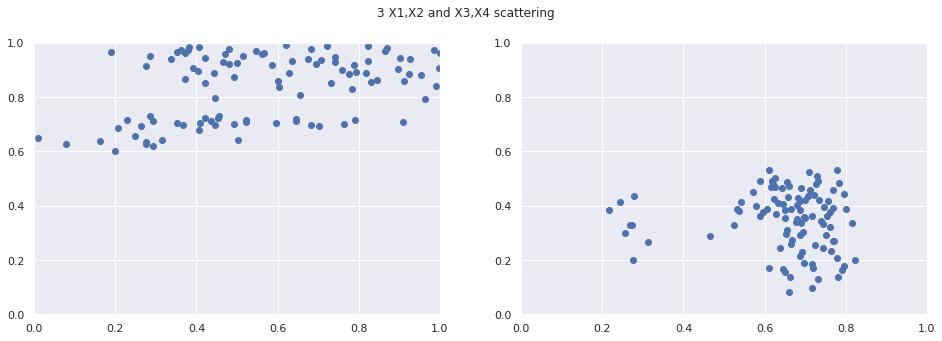

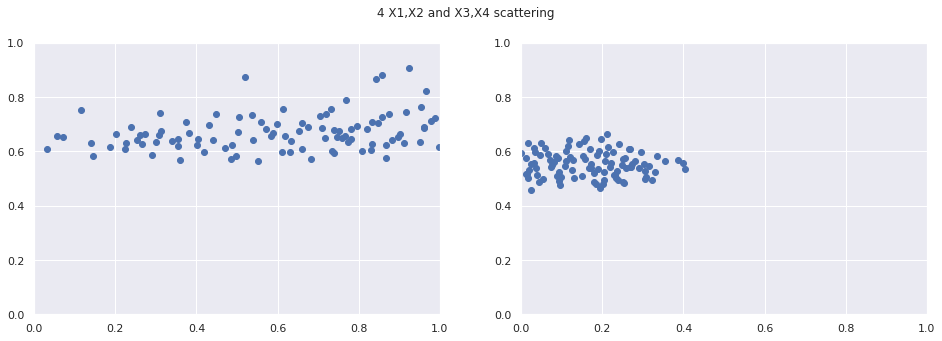

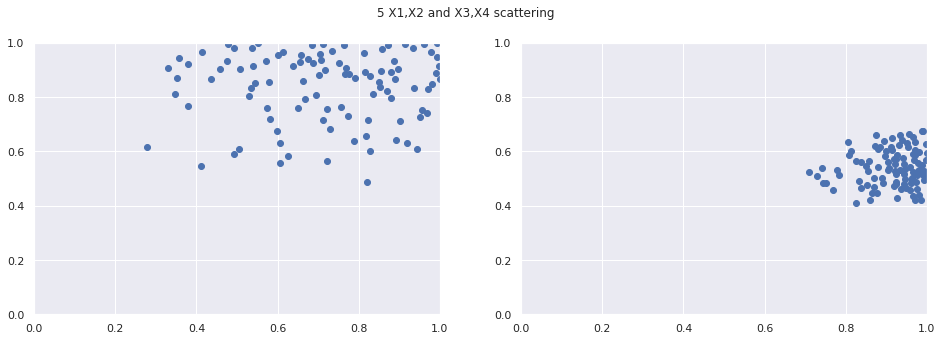

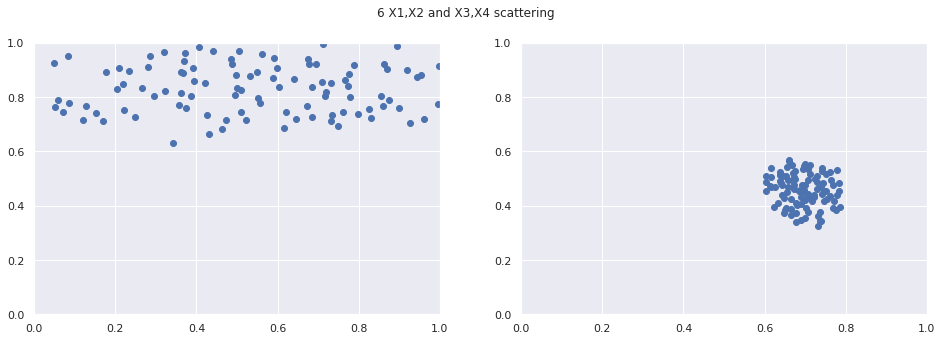

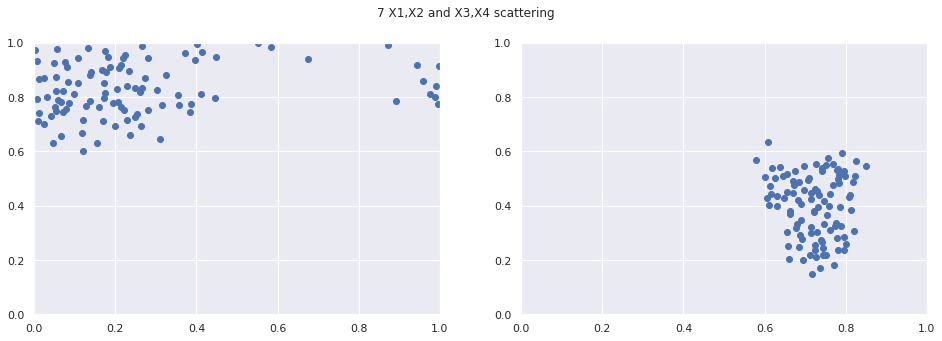

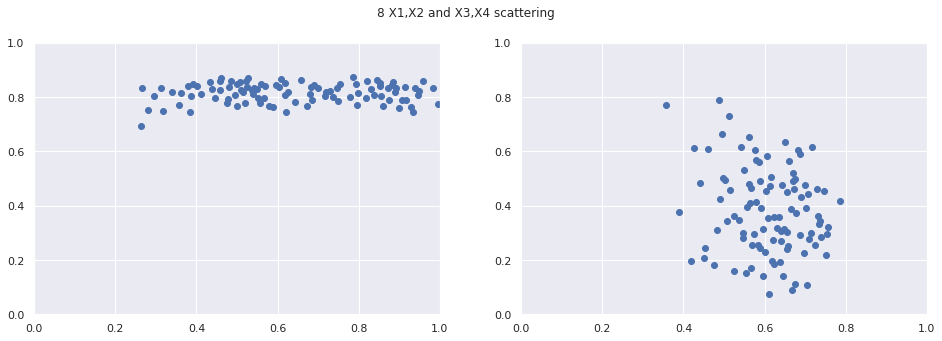

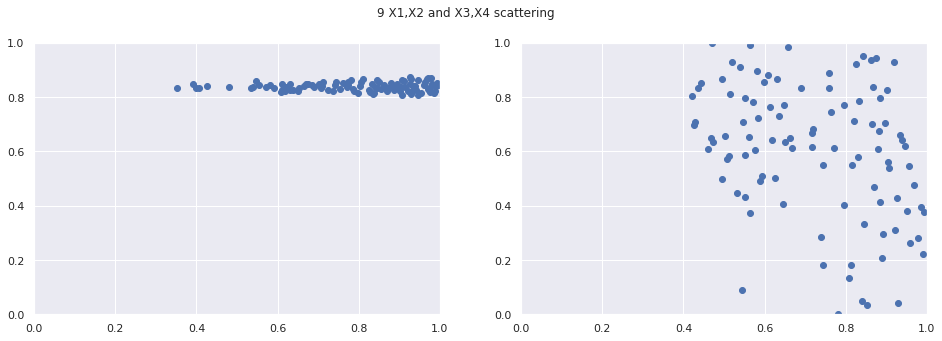

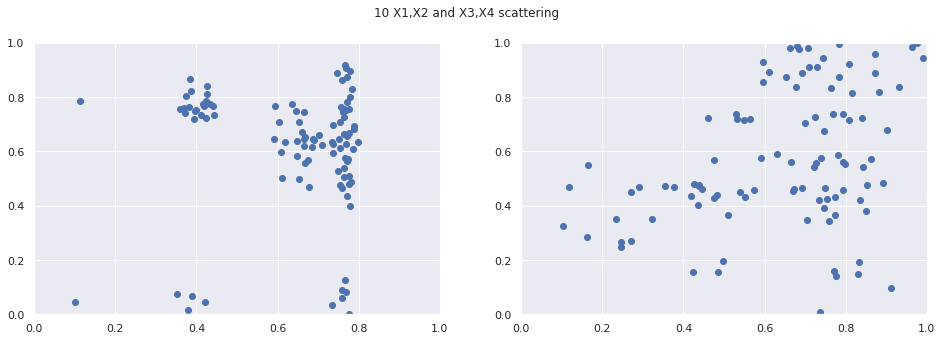

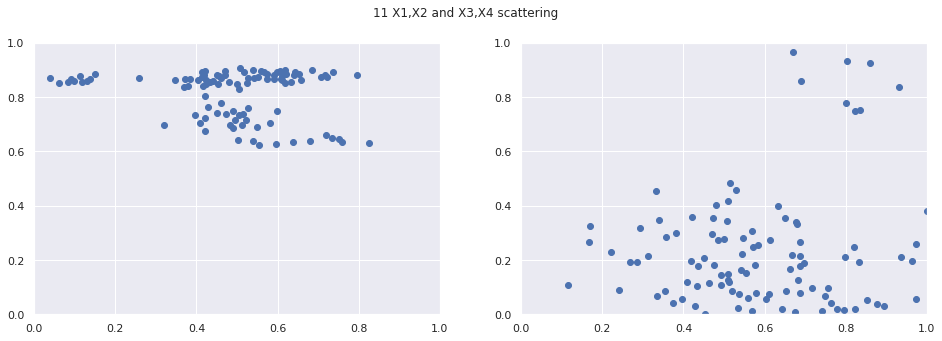

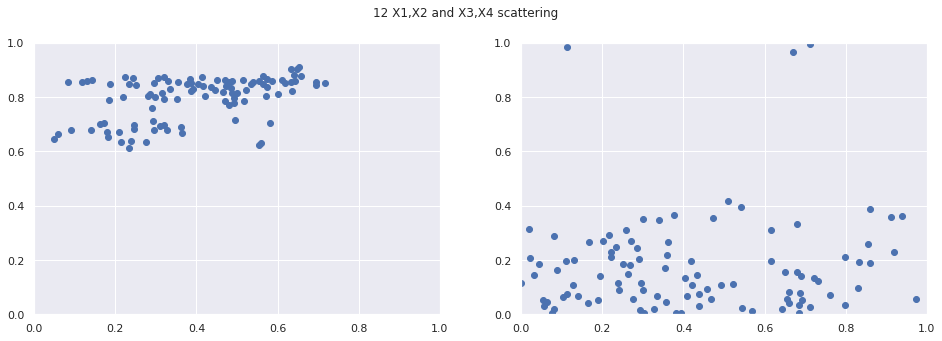

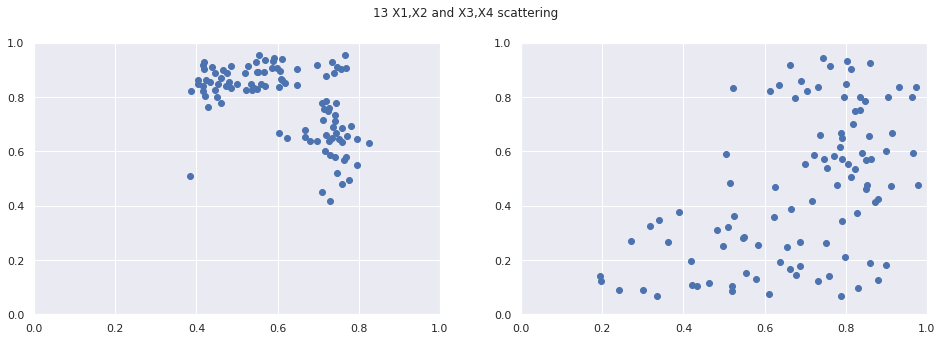

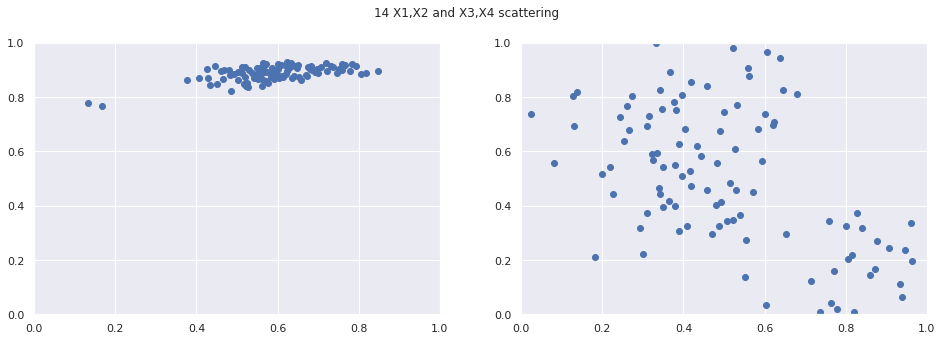

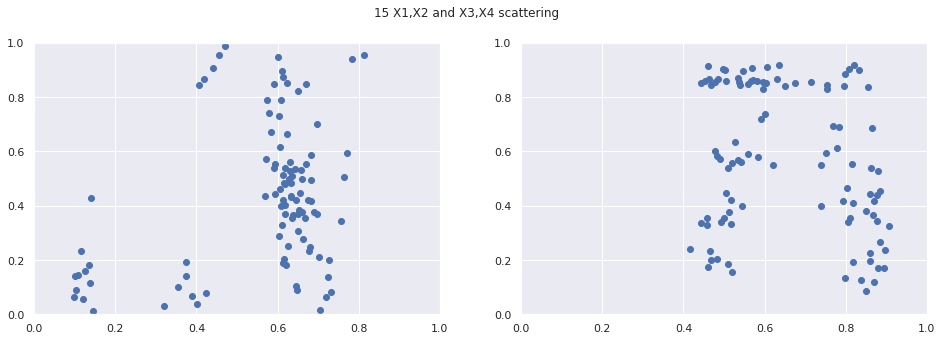

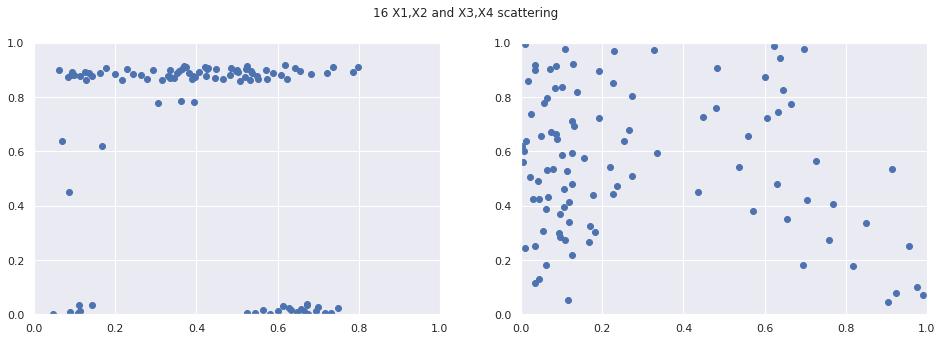

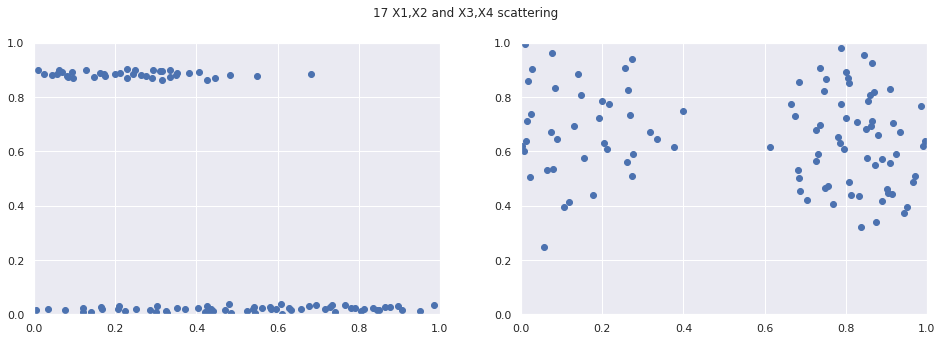

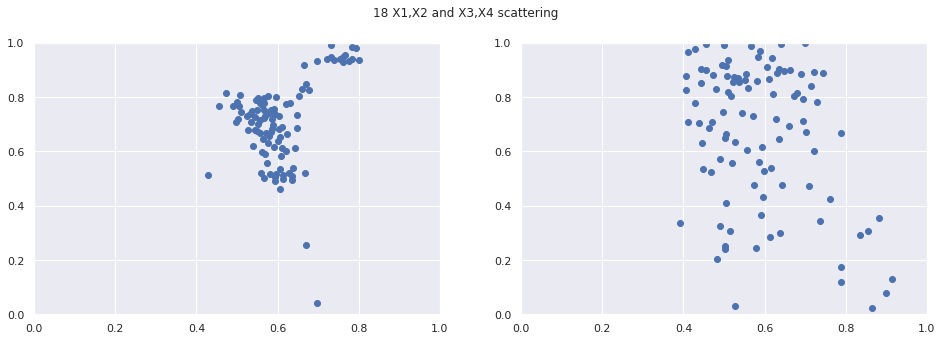

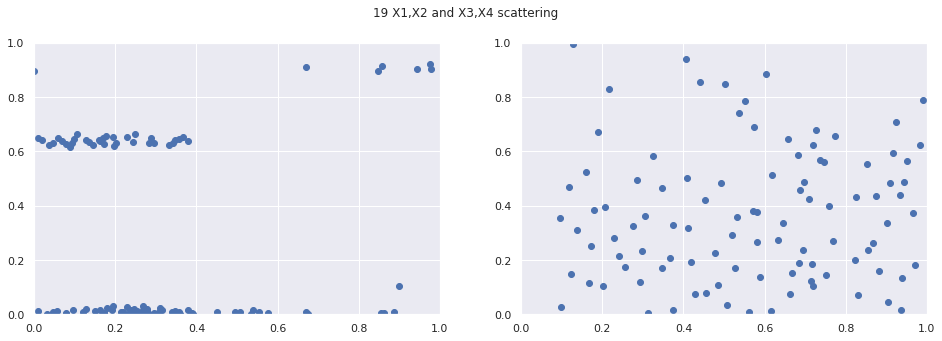

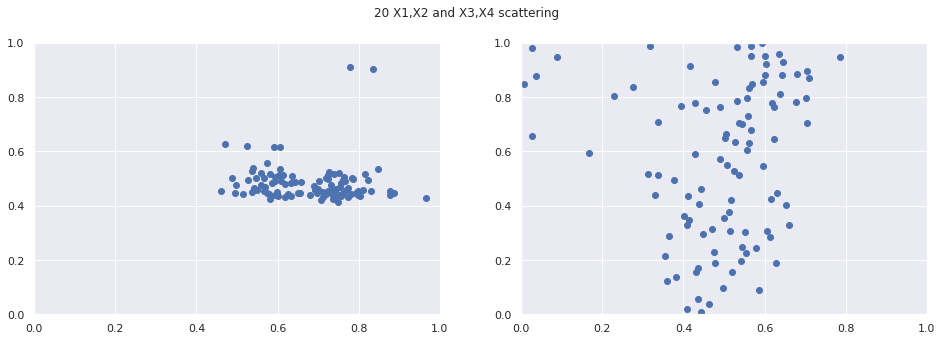

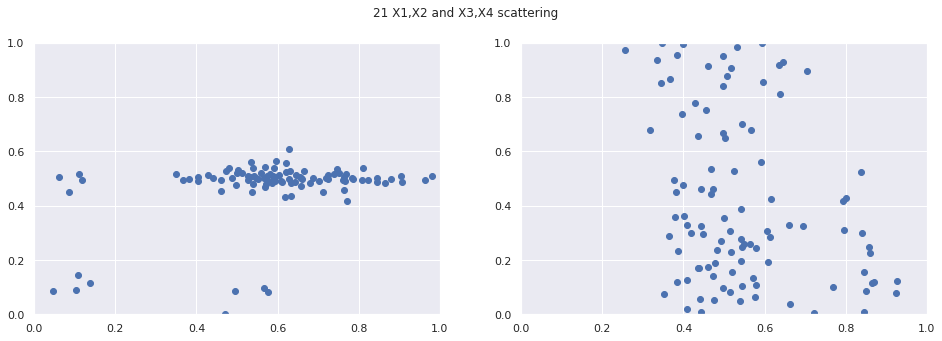

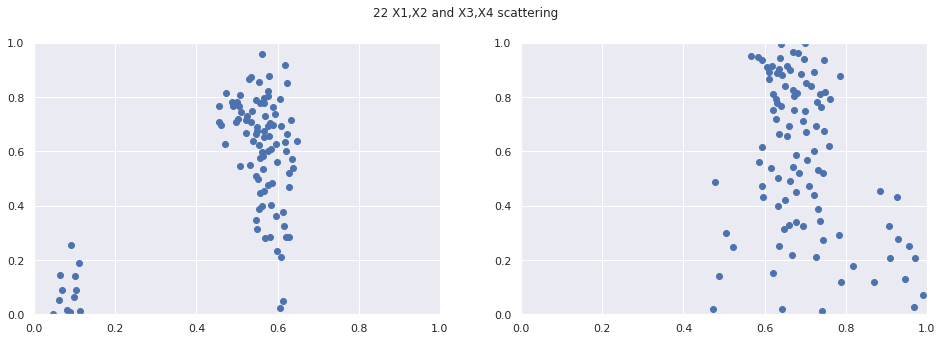

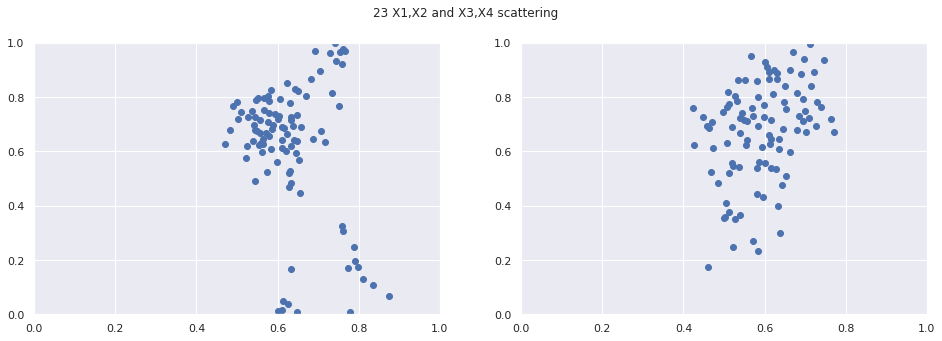

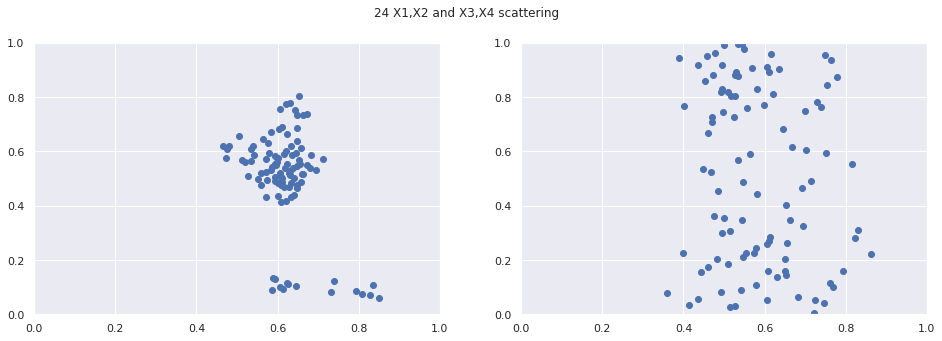

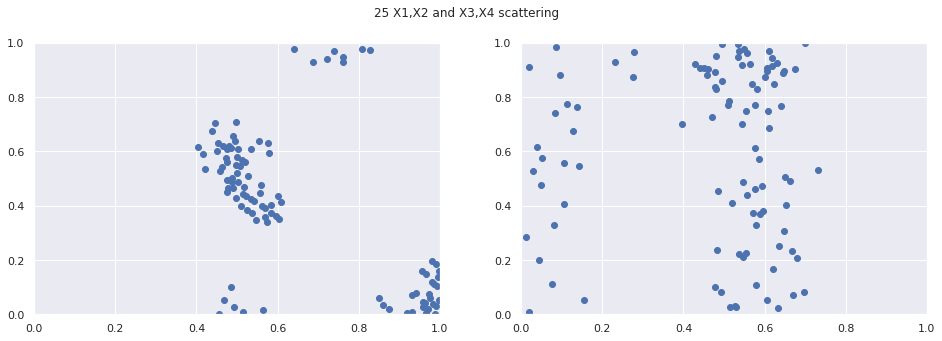

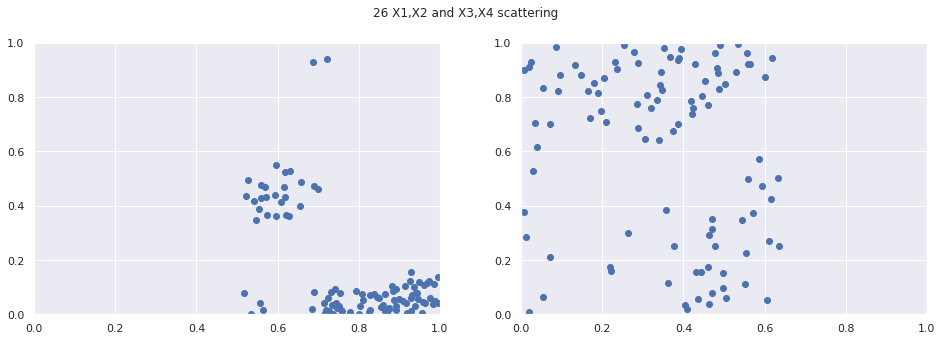

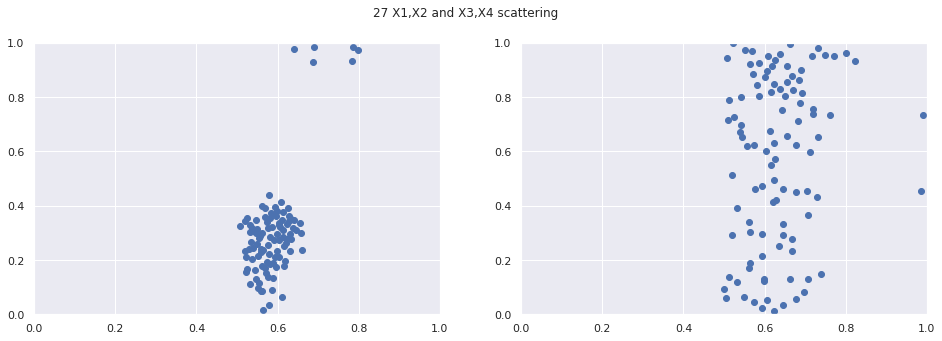

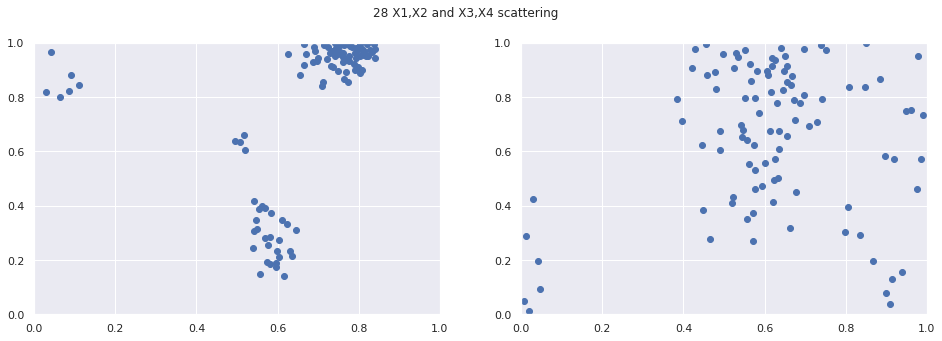

In [51]:
for iter_num in range(len(sort_idx_list_iter)):
    cur_list = sort_idx_list_iter[iter_num][49]
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,5))
    # X1,X2 scattering
    X1s = [ item[0] for item in np.array(grids[iter_num])[cur_list[:100]] ]
    X2s = [ item[1] for item in np.array(grids[iter_num])[cur_list[:100]] ]
    X3s = [ item[2] for item in np.array(grids[iter_num])[cur_list[:100]] ]
    X4s = [ item[3] for item in np.array(grids[iter_num])[cur_list[:100]] ]
    ax1.scatter(X1s,X2s)
    ax1.set_xlim(xmin=0, xmax=1)
    ax1.set_ylim(ymin=0, ymax=1)
    ax2.scatter(X3s,X4s)
    ax2.set_xlim(xmin=0, xmax=1)
    ax2.set_ylim(ymin=0, ymax=1)
    fig.suptitle("%d X1,X2 and X3,X4 scattering"%iter_num)
    plt.show()
    
    

In [40]:
cur_list_test = [1,2,3,4,5,6]
cur_list_test_2 = cur_list_test[:3]

In [44]:
[ item[0] for item in np.array(mapped_grids[0])[cur_list_test_2]]

[-1.6827392578125, 3.3172607421875, 0.8172607421875]

In [ ]:
 fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
    ax1.plot(numbers)
    ax2.plot(numbers)
    ax1.set_ylim([0,100])
    fig.suptitle("%d iter"%iter_num)
    plt.show()